# Applying Different regressions of Customer Churn Telco Data
## Author: Hristo Panov

## 00 Prerequisite and packages

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from pydot import graph_from_dot_data
from IPython.display import Image 

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

# Custom Imports
import sys
sys.path.insert(0, '..')

from utils.const_folders import folder_paths
from utils.function_freqs import freqs

%matplotlib inline

## 01 Read Data

In [2]:
# Read From CSV
df = pd.read_csv(
    f"{folder_paths.path}/data_preprocessed.csv"
    ,sep=","
    ,index_col=None
)

## 02 Basic Checks

In [3]:
# Columns and Rows
print('The dataset contains {one} rows and {two} columns'.format(one=df.shape[0],two=df.shape[1]))
print('Those columns are {one}'.format(one=df.columns.to_list()))

The dataset contains 7043 rows and 61 columns
Those columns are ['customerID', 'GB_FLAG', 'GENDER_FEMALE', 'GENDER_MALE', 'SENIORCITIZEN_NO', 'SENIORCITIZEN_YES', 'PARTNER_NO', 'PARTNER_YES', 'DEPENDENTS_NO', 'DEPENDENTS_YES', 'PHONESERVICE_NO', 'PHONESERVICE_YES', 'MULTIPLELINES_NO', 'MULTIPLELINES_NO_PHONE_SERVICE', 'MULTIPLELINES_YES', 'INTERNETSERVICE_DSL', 'INTERNETSERVICE_FIBER_OPTIC', 'INTERNETSERVICE_NO', 'ONLINESECURITY_NO', 'ONLINESECURITY_NO_INTERNET_SERVICE', 'ONLINESECURITY_YES', 'ONLINEBACKUP_NO', 'ONLINEBACKUP_NO_INTERNET_SERVICE', 'ONLINEBACKUP_YES', 'DEVICEPROTECTION_NO', 'DEVICEPROTECTION_NO_INTERNET_SERVICE', 'DEVICEPROTECTION_YES', 'TECHSUPPORT_NO', 'TECHSUPPORT_NO_INTERNET_SERVICE', 'TECHSUPPORT_YES', 'STREAMINGTV_NO', 'STREAMINGTV_NO_INTERNET_SERVICE', 'STREAMINGTV_YES', 'STREAMINGMOVIES_NO', 'STREAMINGMOVIES_NO_INTERNET_SERVICE', 'STREAMINGMOVIES_YES', 'CONTRACT_MONTH_TO_MONTH', 'CONTRACT_ONE_YEAR', 'CONTRACT_TWO_YEAR', 'PAPERLESSBILLING_NO', 'PAPERLESSBILLING_YE

In [4]:
# Preview
df.sample(5)

,customerID,GB_FLAG,GENDER_FEMALE,GENDER_MALE,SENIORCITIZEN_NO,SENIORCITIZEN_YES,PARTNER_NO,PARTNER_YES,DEPENDENTS_NO,DEPENDENTS_YES,...,TOTALCHARGES_0_260,TOTALCHARGES_261_950,TOTALCHARGES_951_2500,TOTALCHARGES_2501_4500,TOTALCHARGES_4501_HIGH,MONTHLYCHARGES_0_25,MONTHLYCHARGES_26_58,MONTHLYCHARGES_59_80,MONTHLYCHARGES_81_95,MONTHLYCHARGES_96_HIGH
1567,1436-ZMJAN,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
4616,4338-EYCER,1,0,1,1,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
6913,8213-TAZPM,1,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
6775,3259-KNMRR,1,0,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2714,6838-YAUVY,1,1,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [5]:
#Set the index of the data set to be equal to the customerID
df.set_index('customerID',inplace=True)

In [6]:
#Explore Feature types
df.dtypes

GB_FLAG                                  int64
GENDER_FEMALE                            int64
GENDER_MALE                              int64
SENIORCITIZEN_NO                         int64
SENIORCITIZEN_YES                        int64
PARTNER_NO                               int64
PARTNER_YES                              int64
DEPENDENTS_NO                            int64
DEPENDENTS_YES                           int64
PHONESERVICE_NO                          int64
PHONESERVICE_YES                         int64
MULTIPLELINES_NO                         int64
MULTIPLELINES_NO_PHONE_SERVICE           int64
MULTIPLELINES_YES                        int64
INTERNETSERVICE_DSL                      int64
INTERNETSERVICE_FIBER_OPTIC              int64
INTERNETSERVICE_NO                       int64
ONLINESECURITY_NO                        int64
ONLINESECURITY_NO_INTERNET_SERVICE       int64
ONLINESECURITY_YES                       int64
ONLINEBACKUP_NO                          int64
ONLINEBACKUP_

In [7]:
# Lets keep some features out of already preprocessed ones:
list_of_vars_modelling = [
    'GENDER_FEMALE',
    'SENIORCITIZEN_NO',
    'PARTNER_NO',
    'DEPENDENTS_NO',
    'PHONESERVICE_NO',
    'MULTIPLELINES_NO',
    #'MULTIPLELINES_NO_PHONE_SERVICE',
    'INTERNETSERVICE_DSL',
    'INTERNETSERVICE_FIBER_OPTIC',
    'ONLINESECURITY_NO',
    #'ONLINESECURITY_NO_INTERNET_SERVICE',
    'ONLINEBACKUP_NO',
    #'ONLINEBACKUP_NO_INTERNET_SERVICE',
    'DEVICEPROTECTION_NO',
    #'DEVICEPROTECTION_NO_INTERNET_SERVICE',
    'TECHSUPPORT_NO',
    #'TECHSUPPORT_NO_INTERNET_SERVICE',
    'STREAMINGTV_NO',
    #'STREAMINGTV_NO_INTERNET_SERVICE',
    'STREAMINGMOVIES_NO',
    #'STREAMINGMOVIES_NO_INTERNET_SERVICE',
    'CONTRACT_MONTH_TO_MONTH',
    'CONTRACT_ONE_YEAR',
    #'PAPERLESSBILLING_NO',
    'PAYMENTMETHOD_CREDIT_CARD_AUTOMATIC',
    'PAYMENTMETHOD_ELECTRONIC_CHECK',
    'TENURE_0_1',
    'TENURE_2_6',
    'TENURE_41_60',
    'TENURE_61_HIGH',
    #'TOTALCHARGES_0_260',
    #'TOTALCHARGES_261_950',
    #'TOTALCHARGES_2501_4500',
    #'TOTALCHARGES_4501_HIGH',
    'MONTHLYCHARGES_0_25',
    'MONTHLYCHARGES_26_58',
    'MONTHLYCHARGES_81_95',
    'MONTHLYCHARGES_96_HIGH'
]

In [8]:
#Set the dependant variable
dependant_flag = "GB_FLAG"

In [9]:
#Keep modelling variables and dependant variable in different dataframes
telco_data_features = df[df.columns[df.columns.isin(list_of_vars_modelling)]]
#telco_data_features = df.drop([dependant_flag], axis = 1)
telco_data_target = df[dependant_flag]

## 03 Train Test Split

In [10]:
features_train, features_test, target_train, target_test = train_test_split(
    telco_data_features, telco_data_target, train_size = 0.7, test_size = 0.3, random_state = 42)
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape, sep = "\r\n")

(4930, 26)
(2113, 26)
(4930,)
(2113,)


## 04.1 Logistic Regression sklearn

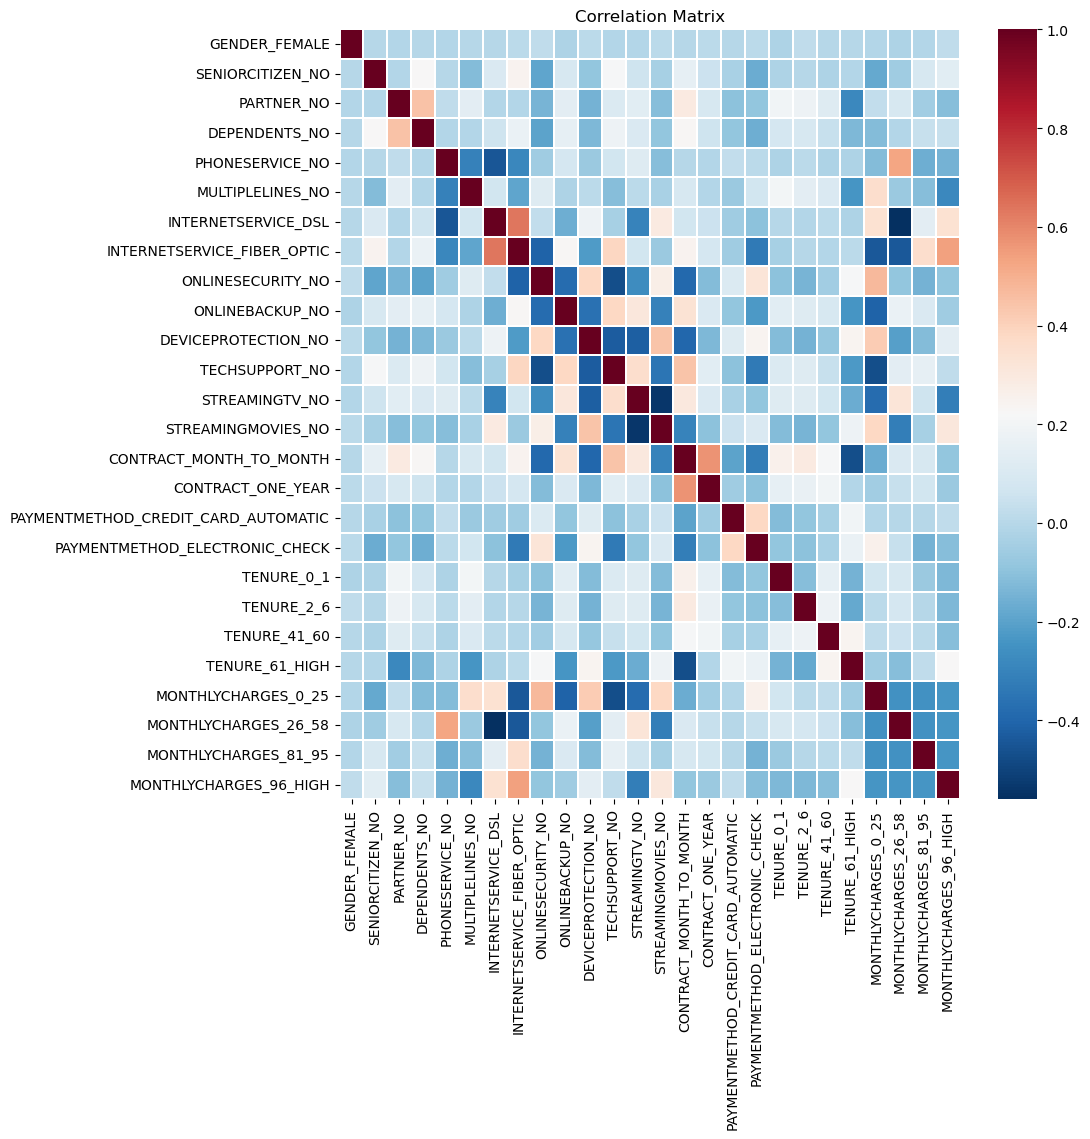

In [11]:
# First observe some correlation:
corr = round(features_train.apply(lambda x: pd.factorize(x)[0]).corr(),2)

plt.figure(figsize=(10, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2,cmap='RdBu_r') #cmap='RdBu_r')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Fit Regression
model = LogisticRegression()
model.fit(features_train, target_train)

LogisticRegression()

In [13]:
feature_name = features_train.columns.values

In [14]:
# Get summary out of the regression
summary_table = pd.DataFrame(columns=["Feature name"], data=feature_name)
summary_table["Coefficients"] = np.transpose(model.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ["Intercept", model.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,3.772063
1,GENDER_FEMALE,-0.087325
2,SENIORCITIZEN_NO,0.208809
3,PARTNER_NO,0.025480
4,DEPENDENTS_NO,-0.107907
5,PHONESERVICE_NO,-0.167011
6,MULTIPLELINES_NO,0.280055
7,INTERNETSERVICE_DSL,-0.443694
8,INTERNETSERVICE_FIBER_OPTIC,-1.400460
9,ONLINESECURITY_NO,-0.431662


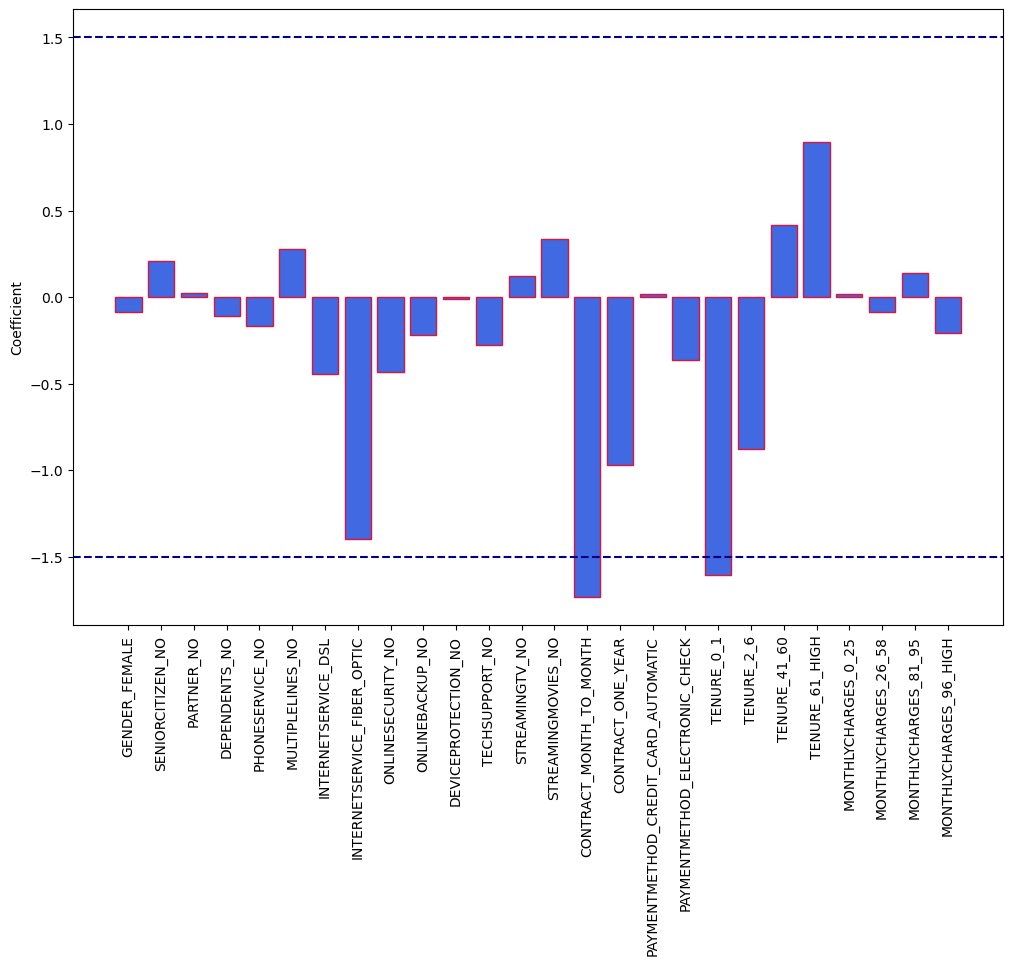

In [15]:
# Plot the Regression Coefficient
plt.figure(figsize=(12,8))
plt.bar(x="Feature name", height='Coefficients',color='royalblue',
        data=summary_table[summary_table['Feature name']!='Intercept'],edgecolor='crimson',capsize = 0,orientation ='vertical')
plt.axhline(y=1.5, color='navy', linestyle='--')
plt.axhline(y=-1.5, color='navy', linestyle='--')
plt.tick_params(axis='x', rotation=90)
plt.ylabel('Coefficient')
plt.show()

In [16]:
score = model.score(features_test, target_test)
print(score)

0.8069096071935636


### 04.2 Linear Regression sklearn

In [17]:
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

In [18]:
feature_name = features_train.columns.values

In [19]:
# Get summary out of the regression
summary_table = pd.DataFrame(columns=["Feature name"], data=feature_name)
summary_table["Coefficients"] = np.transpose(model.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ["Intercept", model.intercept_]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.911425
1,GENDER_FEMALE,-0.015515
2,SENIORCITIZEN_NO,0.048100
3,PARTNER_NO,0.002580
4,DEPENDENTS_NO,-0.011887
5,PHONESERVICE_NO,-0.024096
6,MULTIPLELINES_NO,0.040952
7,INTERNETSERVICE_DSL,0.006550
8,INTERNETSERVICE_FIBER_OPTIC,-0.126527
9,ONLINESECURITY_NO,-0.077015


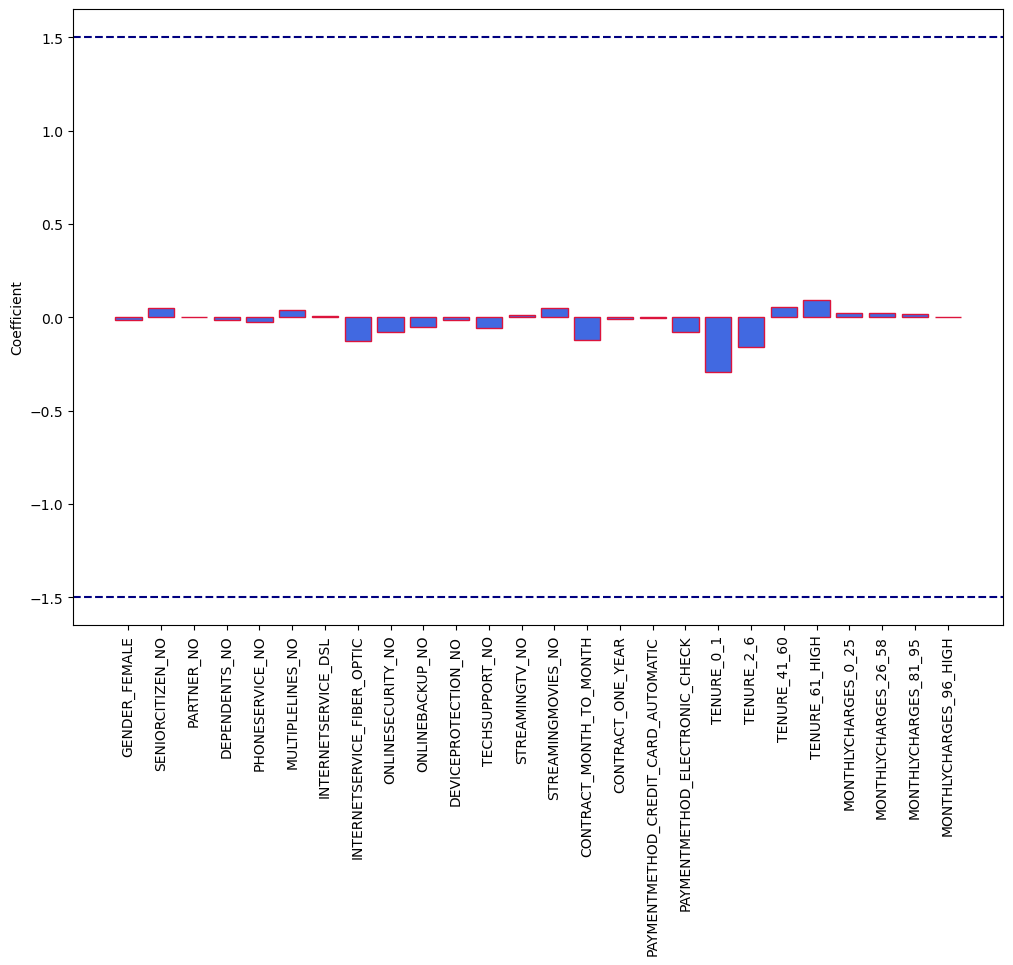

In [20]:
# Plot the Regression Coefficient
plt.figure(figsize=(12,8))
plt.bar(x="Feature name", height='Coefficients',color='royalblue',
        data=summary_table[summary_table['Feature name']!='Intercept'],edgecolor='crimson',capsize = 0,orientation ='vertical')
plt.axhline(y=1.5, color='navy', linestyle='--')
plt.axhline(y=-1.5, color='navy', linestyle='--')
plt.tick_params(axis='x', rotation=90)
plt.ylabel('Coefficient')
plt.show()

In [21]:
score = model.score(features_test, target_test)
print(score)

0.3106692379953472


## 04.3 Decision Tree Sklearn

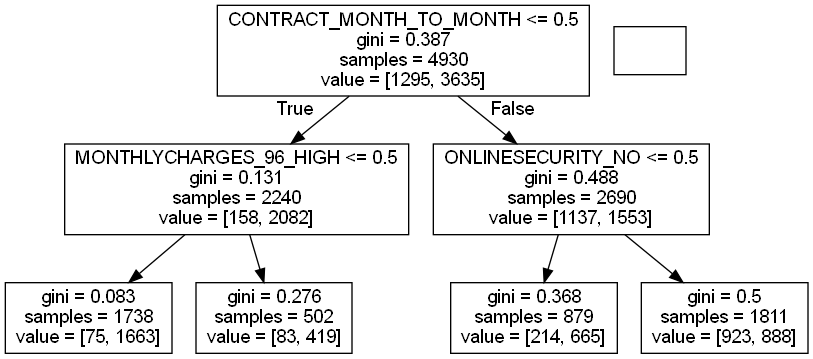

In [31]:
dectree = DecisionTreeClassifier(max_depth = 2,
                             random_state = 5)
dectree.fit(features_train,target_train)
dot_data = StringIO()
export_graphviz(dectree, out_file=dot_data, feature_names=features_train.columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [37]:
#Cross tabs
pd.crosstab(features_train.TECHSUPPORT_NO, 
            features_train.STREAMINGTV_NO, 
            values=(features_train.CONTRACT_MONTH_TO_MONTH), aggfunc='count')

STREAMINGTV_NO,0,1
TECHSUPPORT_NO,,
0,1947,558
1,1036,1389


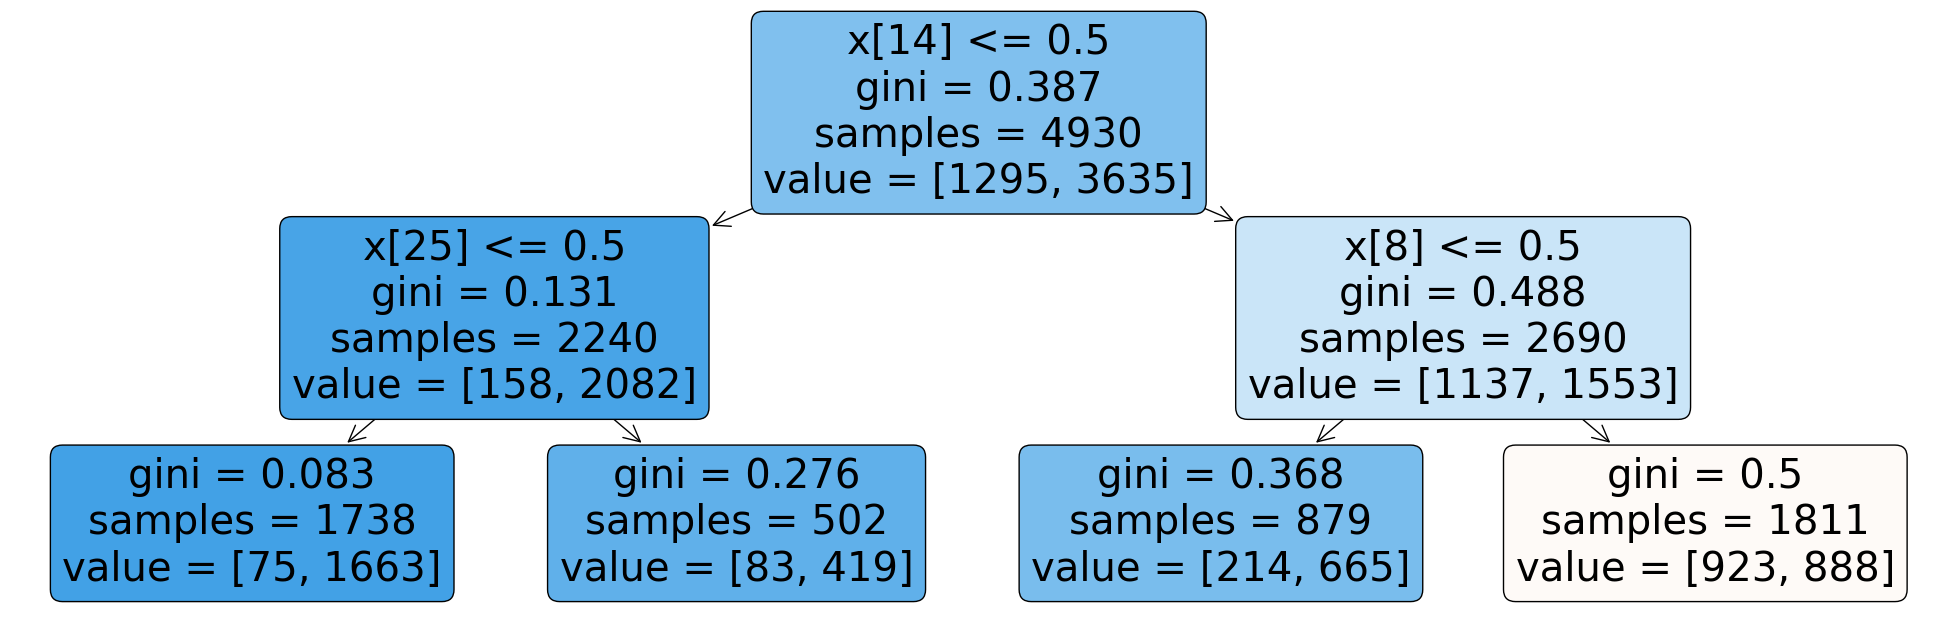

In [42]:
fig = plt.figure(figsize=[25,8])
tree.plot_tree(dectree.fit(features_train,target_train),filled=True,rounded=True)
plt.show()
